<a href="https://colab.research.google.com/github/ayushdiitr/ANN/blob/main/ann_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preview:
    Strain   Stress  Strain Rate  Temperature
0  0.00672  5.64889         0.01          250
1  0.00687  5.77165         0.01          250
2  0.00697  5.89244         0.01          250
3  0.00713  6.01126         0.01          250
4  0.00720  6.12811         0.01          250

Checking for missing values:
Strain         0
Stress         0
Strain Rate    0
Temperature    0
dtype: int64

Checking X for NaN or infinite values:
NaN in X: False
Infinite in X: False

Checking y for NaN or infinite values:
NaN in y: False
Infinite in y: False

Shapes of datasets:
X_train: (5432, 3)
X_test: (1358, 3)
y_train: (5432, 1)
y_test: (1358, 1)

Model Summary:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5995 - mean_absolute_error: 0.5373 - val_loss: 0.0926 - val_mean_absolute_error: 0.1615
Epoch 2/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0621 - mean_absolute_error: 0.1364 - val_loss: 0.0316 - val_mean_absolute_error: 0.0858
Epoch 3/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0233 - mean_absolute_error: 0.0740 - val_loss: 0.0164 - val_mean_absolute_error: 0.0593
Epoch 4/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0123 - mean_absolute_error: 0.0519 - val_loss: 0.0085 - val_mean_absolute_error: 0.0456
Epoch 5/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0068 - mean_absolute_error: 0.0404 - val_loss: 0.0048 - val_mean_absolute_error: 0.0337
Epoch 6/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0040 - mean_absolute_error: 0.0308 - val_loss: 0.0033 - val_mean_absolute_error: 0.0273
Epoch 7/100
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0024 - mean_absolute_error: 0.0

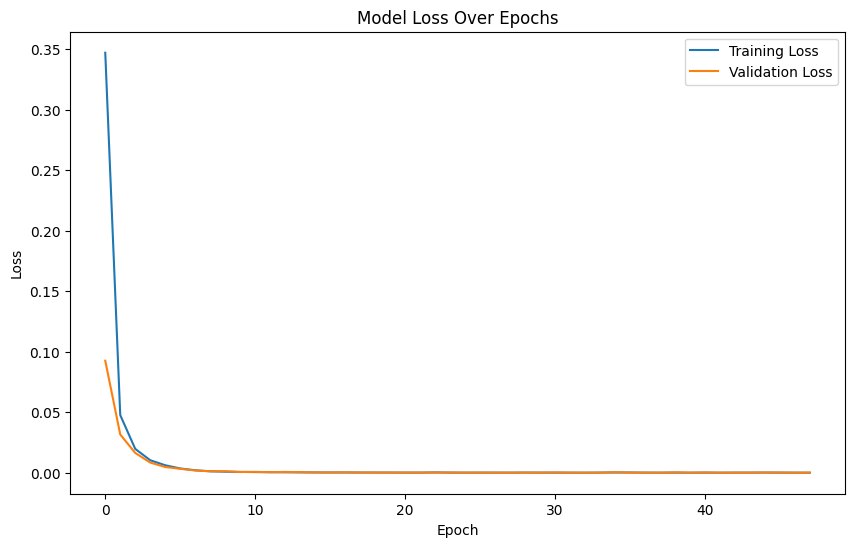


Test Loss (MSE): 6.182611832628027e-05
Test MAE: 0.004183534067124128
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Model Evaluation on Test Set:
Mean Squared Error (MSE): 0.07
Root Mean Squared Error (RMSE): 0.26
R-squared (R2 Score): 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Predicted Flow Stress for new data [1.0000e-02 2.5000e+02 1.7716e-01]:
121.41


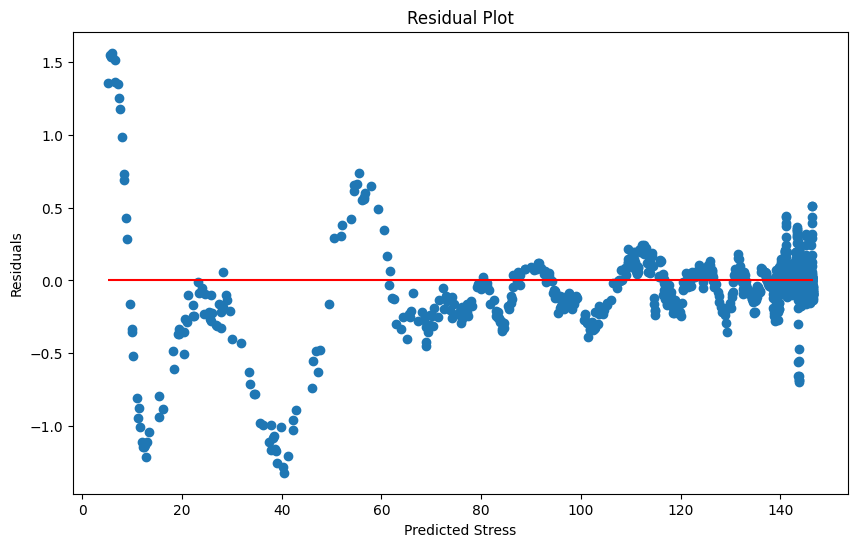

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file from the URL
url = 'https://raw.githubusercontent.com/ayushdiitr/btp/main/data.csv'
data = pd.read_csv(url)

# Display the first few rows to verify the data
print("Data Preview:")
print(data.head())

# Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())

# Drop rows with missing values (if any)
data = data.dropna()

# Extract input features and target variable
X = data[['Strain Rate', 'Temperature', 'Strain']].values
y = data[['Stress']].values

# Check for NaN or Infinite values in X and y
print("\nChecking X for NaN or infinite values:")
print("NaN in X:", np.isnan(X).any())
print("Infinite in X:", np.isinf(X).any())

print("\nChecking y for NaN or infinite values:")
print("NaN in y:", np.isnan(y).any())
print("Infinite in y:", np.isinf(y).any())

# Initialize scalers
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit the scalers on the data
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

print("\nShapes of datasets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

# Build the neural network model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Second hidden layer
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

# Display the model's architecture
print("\nModel Summary:")
model.summary()

# Define EarlyStopping callback to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")

# Make predictions on the test set
y_pred_scaled = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_actual = scaler_y.inverse_transform(y_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_actual, y_pred)

print(f"\nModel Evaluation on Test Set:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")

# New data sample (replace with your actual test data)
new_data = np.array([[0.01, 250, 0.17716]])

# Normalize new data using the same scaler
new_data_scaled = scaler_X.transform(new_data)

# Predict the stress
predicted_stress_scaled = model.predict(new_data_scaled)
predicted_stress = scaler_y.inverse_transform(predicted_stress_scaled)

print(f"\nPredicted Flow Stress for new data {new_data[0]}:")
print(f"{predicted_stress[0][0]:.2f}")

# Calculate residuals
residuals = y_actual - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r')
plt.title('Residual Plot')
plt.xlabel('Predicted Stress')
plt.ylabel('Residuals')
plt.show()
